In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_mtcars = pd.read_csv('mtcars.csv')
data_mtcars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:
data_mtcars.tail()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.9,1,1,5,2
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.5,0,1,5,4
29,Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.5,0,1,5,6
30,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.6,0,1,5,8
31,Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.6,1,1,4,2


In [4]:
data_mtcars.shape

(32, 12)

In [5]:
data_mtcars.nunique()

model    32
mpg      25
cyl       3
disp     27
hp       22
drat     22
wt       29
qsec     30
vs        2
am        2
gear      3
carb      6
dtype: int64

In [6]:
data_mtcars.dtypes

model     object
mpg      float64
cyl        int64
disp     float64
hp         int64
drat     float64
wt       float64
qsec     float64
vs         int64
am         int64
gear       int64
carb       int64
dtype: object

In [7]:
cat_columns = ['cyl','vs','am','gear','carb']
for i in cat_columns:
    data_mtcars[i] = data_mtcars[i].astype('object')

In [8]:
data_mtcars.dtypes

model     object
mpg      float64
cyl       object
disp     float64
hp         int64
drat     float64
wt       float64
qsec     float64
vs        object
am        object
gear      object
carb      object
dtype: object

In [9]:
data_mtcars.isnull().sum()

model    0
mpg      0
cyl      0
disp     0
hp       0
drat     0
wt       0
qsec     0
vs       0
am       0
gear     0
carb     0
dtype: int64

In [10]:
data_mtcars.duplicated().sum()

0

In [11]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(), [2,8,9,10,11])], remainder = 'passthrough')
X = pd.DataFrame(ct.fit_transform(data_mtcars))

In [12]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,Mazda RX4,21.0,160.0,110,3.9,2.62,16.46
1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,Mazda RX4 Wag,21.0,160.0,110,3.9,2.875,17.02
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,Datsun 710,22.8,108.0,93,3.85,2.32,18.61
3,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,Hornet 4 Drive,21.4,258.0,110,3.08,3.215,19.44
4,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,Hornet Sportabout,18.7,360.0,175,3.15,3.44,17.02


In [13]:
X.shape

(32, 23)

In [14]:
data_mtcars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


### Correlation

<AxesSubplot:>

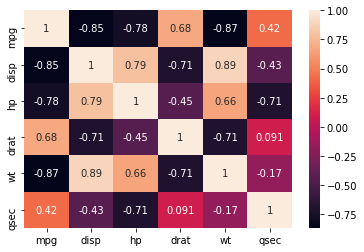

In [15]:
sns.heatmap(data_mtcars.corr(),annot=True)

In [16]:
# disp and mpg are significantly negatively corr
# hp and mpg are significantly negatively corr
#  drat and mpg are moderately corr
# wt and mpg are significantly corr
# +++

### Univariate Analysis

In [17]:
data_mtcars.columns

Index(['model', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am',
       'gear', 'carb'],
      dtype='object')

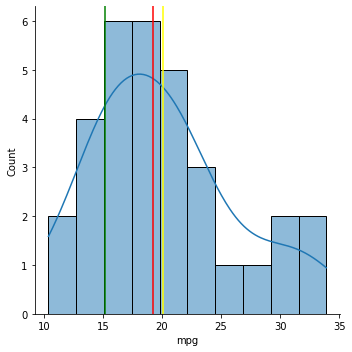

In [18]:
sns.displot(data=data_mtcars,x='mpg',kde=True,bins=10)
plt.axvline(data_mtcars['mpg'].mean(),color='yellow')
plt.axvline(data_mtcars['mpg'].median(),color='red')
plt.axvline(data_mtcars['mpg'].mode()[1],color='green')
plt.show()
# Mean>Median>Mode,Right Skewed, most data falls on right side of the peak

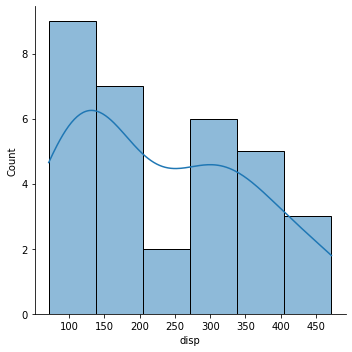

In [19]:
sns.displot(data=data_mtcars,x='disp',kde=True)
plt.show()
# distribution is not normal, it has 2 peaks. 

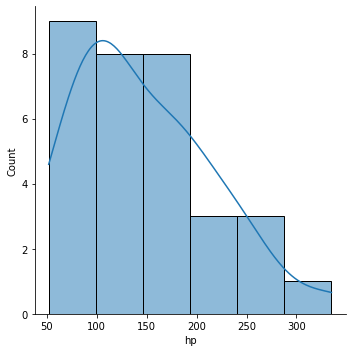

In [20]:
sns.displot(data=data_mtcars,x='hp',kde=True)
plt.show()
# most of the cars have hp<200

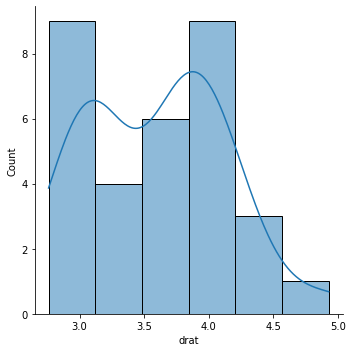

In [21]:
sns.displot(data=data_mtcars,x='drat',kde=True)
plt.show()

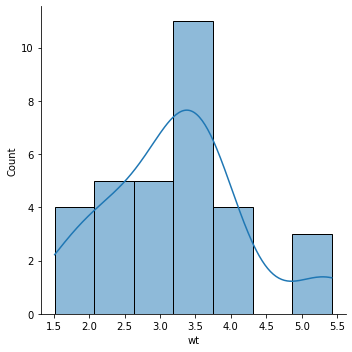

In [22]:
sns.displot(data=data_mtcars,x='wt',kde=True)
plt.show()

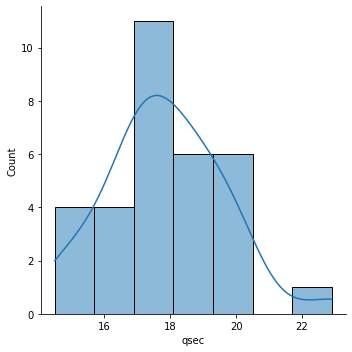

In [23]:
sns.displot(data=data_mtcars,x='qsec',kde=True)
plt.show()

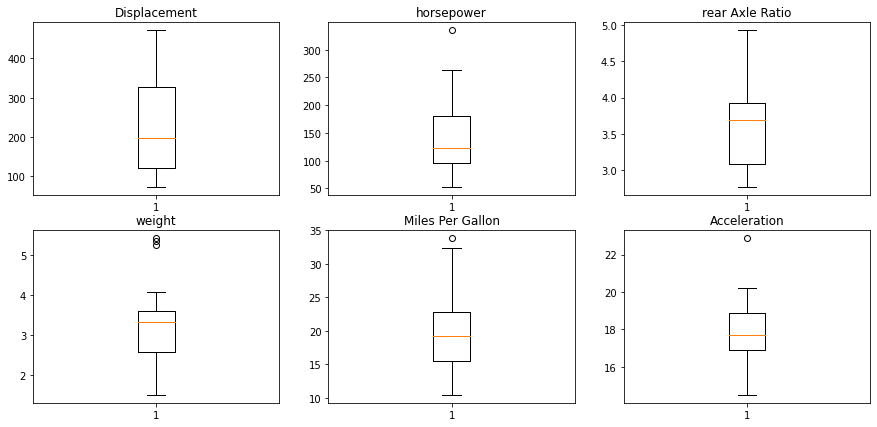

In [24]:
plt.figure(figsize=(15,7))
plt.subplot(231)
plt.boxplot(data_mtcars['disp'])
plt.title('Displacement')
plt.subplot(232)
plt.boxplot(data_mtcars['hp'])
plt.title('horsepower')
plt.subplot(233)
plt.boxplot(data_mtcars['drat'])
plt.title('rear Axle Ratio')
plt.subplot(234)
plt.boxplot(data_mtcars['wt'])
plt.title('weight')
plt.subplot(235)
plt.boxplot(data_mtcars['mpg'])
plt.title('Miles Per Gallon')
plt.subplot(236)
plt.boxplot(data_mtcars['qsec'])
plt.title('Acceleration')
plt.show()

In [25]:
data_mtcars[data_mtcars['hp']>300]

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
30,Maserati Bora,15.0,8,301.0,335,3.54,3.57,14.6,0,1,5,8


In [26]:
data_mtcars[data_mtcars['qsec']>21]

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
8,Merc 230,22.8,4,140.8,95,3.92,3.15,22.9,1,0,4,2


In [27]:
data_mtcars[data_mtcars['mpg']>33]

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
19,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.9,1,1,4,1


In [28]:
data_mtcars[(data_mtcars['hp']<66) & (data_mtcars['hp']>60)]

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.0,1,0,4,2
19,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.9,1,1,4,1


In [29]:
data_mtcars.groupby('carb')['mpg'].mean()

carb
1    25.342857
2    22.400000
3    16.300000
4    15.790000
6    19.700000
8    15.000000
Name: mpg, dtype: float64

In [30]:
data_mtcars['mpg'].mean() # replace the outlier by mean of carb 1

20.090624999999996

### Bivariate

<AxesSubplot:xlabel='cyl'>

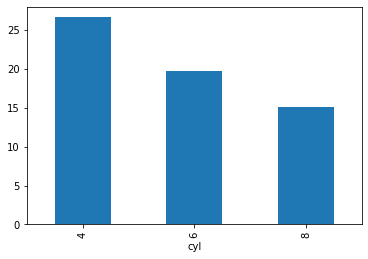

In [31]:
data_mtcars.groupby('cyl')['mpg'].mean().plot(kind='bar')
# Best avg miles per gallon is provided by cars that have 4 cylinders

<AxesSubplot:xlabel='gear'>

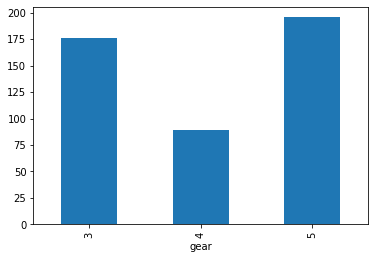

In [32]:
data_mtcars.groupby('gear')['hp'].mean().plot(kind='bar')
# Maximum horse power is provided by 5 gears though 3 gears are pretty much same.
# Can perform a ttest to check this claim.

<AxesSubplot:>

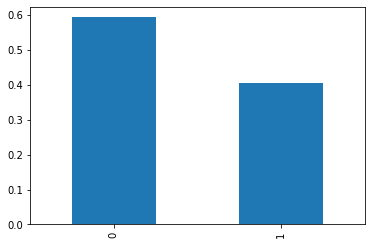

In [33]:
data_mtcars['am'].value_counts(normalize=True).plot(kind='bar')

<AxesSubplot:xlabel='am'>

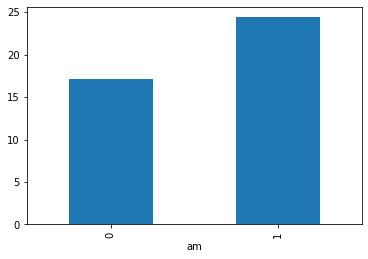

In [34]:
data_mtcars.groupby('am')['mpg'].mean().plot(kind='bar')
#0 is auto and 1 is manual

<AxesSubplot:xlabel='am'>

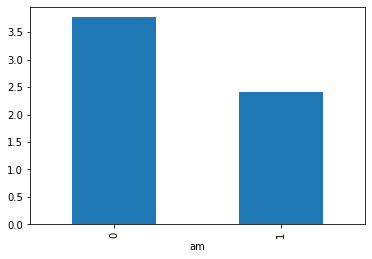

In [35]:
data_mtcars.groupby('am')['wt'].mean().plot(kind='bar')


In [36]:
ES = pd.crosstab(data_mtcars['gear'],data_mtcars['cyl'])
print(ES)

cyl   4  6   8
gear          
3     1  2  12
4     8  4   0
5     2  1   2


<AxesSubplot:xlabel='gear'>

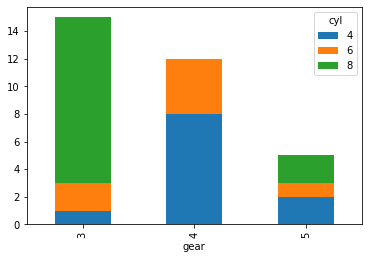

In [37]:
ES.plot(kind='bar',stacked='True')

<AxesSubplot:xlabel='gear'>

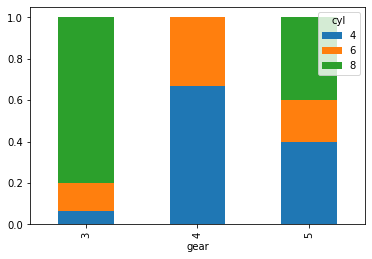

In [38]:
ES.div(ES.sum(1),axis=0).plot(kind='bar',stacked='True')
# There are no cars that have 4 gears and 8 cylinders.

In [39]:
ES.div(ES.sum(1),axis=0)

cyl,4,6,8
gear,,,
3,0.066667,0.133333,0.8
4,0.666667,0.333333,0.0
5,0.400000,0.200000,0.4


In [40]:
# Kaveri Feature Engineering best

Explain why or why not can we create line chart and scatter plots use using categorical data. State some good examples.

We can't create line chart or scatter plot just with categorical data. We need to have numerical variable which will be used for plotting. In addition to it, we can use categorical variables to add more details to a graph.

For example, If we plot a scatter plot with weight and age, then we can add 'Sex' to it , to segregate the data based on Sex but we can't make a scatter plot just with Sex Column.

In line plot, for example, we can plot weights of male and female to compare them. Here, weight are numerical variable and to add more information to graph we add 'Sex' Column to convert it into multiple line graph which gives us a better visualisation.


In [41]:
list(data_mtcars.columns)

['model',
 'mpg',
 'cyl',
 'disp',
 'hp',
 'drat',
 'wt',
 'qsec',
 'vs',
 'am',
 'gear',
 'carb']

<AxesSubplot:xlabel='mpg', ylabel='qsec'>

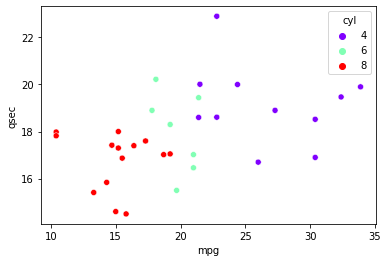

In [42]:
sns.scatterplot(data=data_mtcars,x='mpg',y='qsec',hue='cyl',palette='rainbow')
# As we can see `we can see that the three clusters can be seperated easily. Cars with 8 cylinders have low mpg and acc , cars with 6 cylinders have mdeium mpg and low to medium qsec or acc and cars with 4 cylinders have high mpg and medium qsec(with one outlier).

In [43]:
data_mtcars['carb'].value_counts()

4    10
2    10
1     7
3     3
6     1
8     1
Name: carb, dtype: int64

<AxesSubplot:xlabel='carb'>

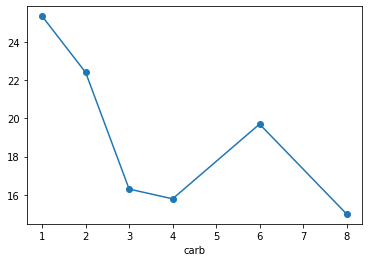

In [44]:
data_mtcars.groupby('carb')['mpg'].mean().plot(kind='line',marker='o')
# X and Y axis assume a continous data, so here carb doesn't have any value for 5 or 7. But there is no break in line, it just continues though it doesn't have any marker but still not a good way

In [45]:
data_mtcars['carb'] = data_mtcars['carb'].replace(8,'Many')
data_mtcars['carb'] = data_mtcars['carb'].replace(6,'Six')
data_mtcars['carb'] = data_mtcars['carb'].replace(4,'four')
data_mtcars['carb'] = data_mtcars['carb'].replace(3,'Three')
data_mtcars['carb'] = data_mtcars['carb'].replace(2,'two')
data_mtcars['carb'] = data_mtcars['carb'].replace(1,'one')


<AxesSubplot:xlabel='carb'>

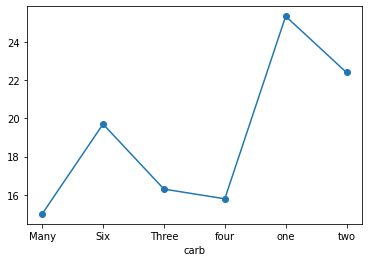

In [46]:
data_mtcars.groupby('carb')['mpg'].mean().plot(kind='line',marker='o')


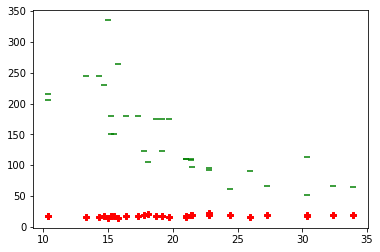

In [47]:
plt.scatter(data=data_mtcars,x='mpg',y='qsec',marker='P',color='red')
plt.scatter(data=data_mtcars,x='mpg',y='hp',marker='_',color='green')

In [48]:
X= data_mtcars[['mpg','qsec','hp']]

In [49]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
X = SS.fit_transform(X)
X = pd.DataFrame(X,columns=['mpg','qsec','hp'])

In [50]:
X.head()

,mpg,qsec,hp
0,0.153299,-0.789601,-0.543655
1,0.153299,-0.471202,-0.543655
2,0.456737,0.432823,-0.795570
3,0.220730,0.904736,-0.543655
4,-0.234427,-0.471202,0.419550


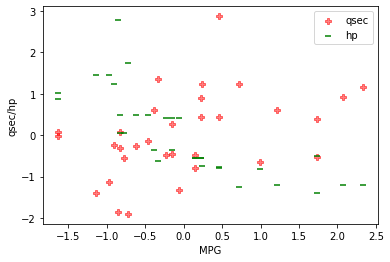

In [51]:
plt.scatter(data=X,x='mpg',y='qsec',marker='P',color='red',alpha=0.5)
plt.scatter(data=X,x='mpg',y='hp',marker='_',color='green')
plt.legend()
plt.xlabel('MPG')
plt.ylabel('qsec/hp')
plt.show()
#As mpg increases, qsec increases and hp falls

### Histogram, Area Chart and Pie charts

(array([2., 4., 6., 6., 5., 3., 1., 1., 2., 2.]),
 array([10.4 , 12.75, 15.1 , 17.45, 19.8 , 22.15, 24.5 , 26.85, 29.2 ,
        31.55, 33.9 ]),
 <BarContainer object of 10 artists>)

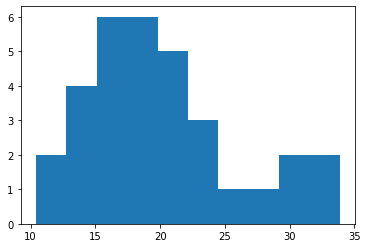

In [58]:
plt.hist(data_mtcars['mpg'])

In [65]:
cont_cols = data_mtcars.select_dtypes('float64')

In [66]:
data_mtcars.dtypes

model     object
mpg      float64
cyl       object
disp     float64
hp         int64
drat     float64
wt       float64
qsec     float64
vs        object
am        object
gear      object
carb      object
dtype: object

{'mpg'}


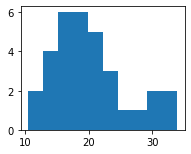

{'disp'}


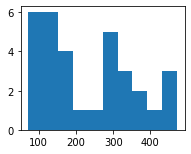

{'drat'}


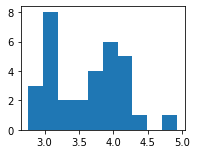

{'wt'}


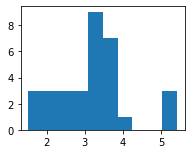

{'qsec'}


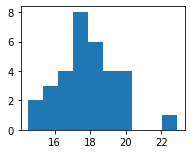

In [93]:
for col in cont_cols:
    plt.figure(figsize=(10,5))
    print({col})
    i=1
    plt.subplot(2,3,i)
    plt.hist(data_mtcars[col])
    i=i+1
    plt.show()

In [78]:
view = data_mtcars.groupby('cyl',as_index=False)[['mpg','qsec']].mean()

In [79]:
view.head()

,cyl,mpg,qsec
0,4,26.663636,19.137273
1,6,19.742857,17.977143
2,8,15.100000,16.772143


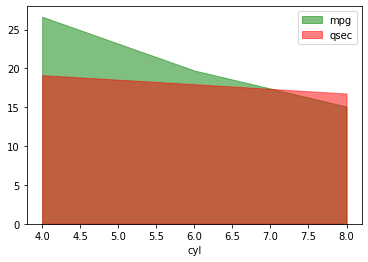

In [94]:
plt.stackplot(view['cyl'],view['mpg'],color='green',alpha=0.5)
plt.stackplot(view['cyl'],view['qsec'],color='red',alpha=0.5)
plt.xlabel('cyl')
plt.legend(('mpg','qsec'))
plt.show()

In [55]:
rear = data_mtcars.groupby('am',as_index=False)['mpg'].mean()

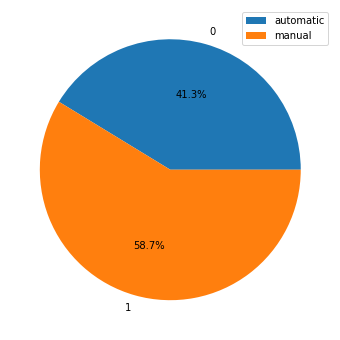

In [91]:
plt.figure(figsize=(6,6))
plt.pie(x=rear['mpg'],labels=rear['am'],autopct='%1.1f%%')
plt.legend(('automatic','manual'),loc='best')
plt.show()

In [96]:
data_mtcars[(data_mtcars['mpg']>18) & (data_mtcars['mpg']<22)]

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,four
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,four
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,one
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,two
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,one
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,four
20,Toyota Corona,21.5,4,120.1,97,3.70,2.465,20.01,1,0,3,one
24,Pontiac Firebird,19.2,8,400.0,175,3.08,3.845,17.05,0,0,3,two
29,Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.50,0,1,5,Six
31,Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.60,1,1,4,two
